In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
#matplotlib.rcParams['pdf.fonttype'] = 42

In [3]:
from cycler import cycler

In [4]:
from matplotlib.ticker import FuncFormatter

In [5]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [6]:
pd.set_option('display.max_colwidth', 400)
pd.set_option('display.max_rows',4000)

In [7]:
df = pd.read_csv('UNdata_tobacco.csv')
df.head()

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg)
0,Afghanistan,2016,Cigarettes containing tobacco,Import,49111872.0,2629072.0
1,Afghanistan,2016,Homogenized or reconstituted tobacco,Import,1177842.0,NaN
2,Afghanistan,2015,Cigarettes containing tobacco,Import,87227851.0,4347904.0
3,Afghanistan,2015,Homogenized or reconstituted tobacco,Import,427504.0,106520.0
4,Afghanistan,2014,Cigarettes containing tobacco,Import,3984800.0,207074.0


In [8]:
#THE ORIGINAL DATABASE DOES NOT PROVIDE WEIGHT VALUES FOR ALL TYPES OF COMMODITY EXPORTED. 
#THAT IS GOING TO AFFECT HOW FAR THE ANALYSIS CAN GO.
# China = df[df['Country or Area'].str.contains("China, Hong Kong SAR", case=False, na=False)]
# China.head()

In [9]:
df.columns = df.columns.str.replace('\s+', '_')

In [10]:
df.columns = df.columns.str.replace('(','_')

In [11]:
df.columns = df.columns.str.replace(')','_')

In [12]:
df.columns = df.columns.str.replace('Country_or_Area','Country_Area')
df.columns = df.columns.str.replace('Trade__USD_','USD')
df.columns = df.columns.str.replace('Weight__kg_','Weight')

In [13]:
df.head(1)

,Country_Area,Year,Commodity,Flow,USD,Weight
0,Afghanistan,2016,Cigarettes containing tobacco,Import,49111872.0,2629072.0


In [14]:
df.count()

Country_Area    48995
Year            48995
Commodity       48995
Flow            48995
USD             48995
Weight          48285
dtype: int64

In [15]:
df.Flow.value_counts()

Import       26829
Export       18849
Re-Export     2692
Re-Import      625
Name: Flow, dtype: int64

In [16]:
export_df = df[df.Flow.str.contains("Export", case=False, na=False)]
export_df.head()
#export_df.Flow.value_counts()

,Country_Area,Year,Commodity,Flow,USD,Weight
14,Albania,2016,"Tobacco, unmanufactured, not stemmed or stripped",Export,183785.0,103767.0
15,Albania,2016,"Tobacco, unmanufactured, stemmed or stripped",Export,4110889.0,1323120.0
18,Albania,2016,Cigarettes containing tobacco,Export,694779.0,162157.0
24,Albania,2013,"Tobacco, unmanufactured, stemmed or stripped",Export,4603628.0,1205741.0
27,Albania,2013,Cigarettes containing tobacco,Export,1495582.0,309236.0


In [17]:
import numpy as np

In [18]:
export_df['Flow2'] = np.where(export_df['Flow']=='Export','domestic','foreign')
export_df.head()
#export_df.Flow2.value_counts()

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Country_Area,Year,Commodity,Flow,USD,Weight,Flow2
14,Albania,2016,"Tobacco, unmanufactured, not stemmed or stripped",Export,183785.0,103767.0,domestic
15,Albania,2016,"Tobacco, unmanufactured, stemmed or stripped",Export,4110889.0,1323120.0,domestic
18,Albania,2016,Cigarettes containing tobacco,Export,694779.0,162157.0,domestic
24,Albania,2013,"Tobacco, unmanufactured, stemmed or stripped",Export,4603628.0,1205741.0,domestic
27,Albania,2013,Cigarettes containing tobacco,Export,1495582.0,309236.0,domestic


In [19]:
#pd.options.display.float_format = '{:.0f}'.format

In [20]:
export_df.Flow.replace("Re-Export", 'Export',inplace=True)
#export_df = export_df.drop(export_df[export_df.Flow == 'Re-Export'].index)
export_df.head()
#export_df.Flow2.value_counts()


C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Country_Area,Year,Commodity,Flow,USD,Weight,Flow2
14,Albania,2016,"Tobacco, unmanufactured, not stemmed or stripped",Export,183785.0,103767.0,domestic
15,Albania,2016,"Tobacco, unmanufactured, stemmed or stripped",Export,4110889.0,1323120.0,domestic
18,Albania,2016,Cigarettes containing tobacco,Export,694779.0,162157.0,domestic
24,Albania,2013,"Tobacco, unmanufactured, stemmed or stripped",Export,4603628.0,1205741.0,domestic
27,Albania,2013,Cigarettes containing tobacco,Export,1495582.0,309236.0,domestic


In [21]:
export_df.Flow2.value_counts()

domestic    18849
foreign      2692
Name: Flow2, dtype: int64

In [22]:
export_df.Commodity.value_counts()

Cigarettes containing tobacco                            3839
Cigarette or pipe tobacco and tobacco substitute mixe    2774
Cigars, cheroots and cigarillos, containing tobacco      2688
Tobacco, unmanufactured, stemmed or stripped             2598
Tobacco, unmanufactured, not stemmed or stripped         2523
Products of tobacco, substitute nes, extract, essence    2106
Cigars, cheroots, cigarettes, with tobacco substitute    1996
Tobacco refuse                                           1921
Homogenized or reconstituted tobacco                     1096
Name: Commodity, dtype: int64

In [23]:
pd.options.display.float_format = '{:.2f}'.format

In [24]:
#"Export" refers to domestic goods exported and "Re-Export" refers to foreign goods exported
df_2017 = export_df[export_df['Year']==2017]
df_2017.head()

,Country_Area,Year,Commodity,Flow,USD,Weight,Flow2
198,Algeria,2017,Cigarettes containing tobacco,Export,11974.74,865.81,domestic
200,Algeria,2017,"Products of tobacco, substitute nes, extract, essence",Export,5808.69,410.00,domestic
821,Argentina,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,5629831.27,2276578.90,domestic
823,Argentina,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,287135184.05,60726136.60,domestic
825,Argentina,2017,Tobacco refuse,Export,10458316.40,20653260.00,domestic


In [25]:
#LET'S REMOVE 'EU-28'
df_2017 = df_2017[df_2017.Country_Area != 'EU-28']
df_2017.head()

,Country_Area,Year,Commodity,Flow,USD,Weight,Flow2
198,Algeria,2017,Cigarettes containing tobacco,Export,11974.74,865.81,domestic
200,Algeria,2017,"Products of tobacco, substitute nes, extract, essence",Export,5808.69,410.00,domestic
821,Argentina,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,5629831.27,2276578.90,domestic
823,Argentina,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,287135184.05,60726136.60,domestic
825,Argentina,2017,Tobacco refuse,Export,10458316.40,20653260.00,domestic


In [26]:
#df_2017.Flow.value_counts()

In [27]:
#Getting trade values (USD) for exports of domestic goods and for exports of foreign goods 
domfor = df_2017.groupby(['Country_Area','Flow2']).USD.median().unstack().reset_index().fillna(0)
domfor.columns = domfor.columns.str.replace('domestic', 'domestic_goods_USD')
domfor.columns = domfor.columns.str.replace('foreign', 'foreign_goods_USD')
domfor.head()

Flow2,Country_Area,domestic_goods_USD,foreign_goods_USD
0,Algeria,8891.72,0.00
1,Argentina,5232511.53,0.00
2,Armenia,34317.05,0.00
3,Barbados,226065.50,216200.00
4,Belgium,74518445.92,0.00


In [28]:
usd_2017 = df_2017.groupby('Country_Area')['USD'].sum().reset_index(name='usd_2017')
top20_usd17 = usd_2017.sort_values(by='usd_2017', ascending=True).tail(20)
top20_usd17.tail()

,Country_Area,usd_2017
10,"China, Hong Kong SAR",1769986179.50
6,Brazil,2092160511.00
54,USA,3089718026.00
39,Poland,3340492853.00
18,Germany,4519131766.27


In [29]:
top20_domfor = pd.merge(top20_usd17,  domfor, on='Country_Area')
top20_domfor.head()

,Country_Area,usd_2017,domestic_goods_USD,foreign_goods_USD
0,Philippines,277496260.00,8421631.00,0.00
1,Bulgaria,292856145.72,1227459.86,0.00
2,Argentina,322269829.52,5232511.53,0.00
3,Ukraine,355730145.18,165572.80,0.00
4,Switzerland,548545302.90,6468788.41,0.00


In [30]:
domfor_usd = top20_domfor[['Country_Area','domestic_goods_USD','foreign_goods_USD']]
domfor_usd.head()
#domfor_usd.plot(kind='barh',x='Country_Area')

,Country_Area,domestic_goods_USD,foreign_goods_USD
0,Philippines,8421631.00,0.00
1,Bulgaria,1227459.86,0.00
2,Argentina,5232511.53,0.00
3,Ukraine,165572.80,0.00
4,Switzerland,6468788.41,0.00


In [31]:
#df[['col1', 'col2', 'col3']]

In [32]:
df_2017.USD.sum()

29247913937.43511

In [33]:
top20_usd17.usd_2017.sum()

25975963140.33333

In [34]:
round(top20_usd17.usd_2017.sum()/df_2017.USD.sum()*100)

89.0

In [35]:
test2 = pd.merge(top20_usd17, domfor_usd, on='Country_Area')
test2.head()

,Country_Area,usd_2017,domestic_goods_USD,foreign_goods_USD
0,Philippines,277496260.00,8421631.00,0.00
1,Bulgaria,292856145.72,1227459.86,0.00
2,Argentina,322269829.52,5232511.53,0.00
3,Ukraine,355730145.18,165572.80,0.00
4,Switzerland,548545302.90,6468788.41,0.00


In [36]:
test3 = pd.merge(test2, df_2017, on='Country_Area')
test3.head()

,Country_Area,usd_2017,domestic_goods_USD,foreign_goods_USD,Year,Commodity,Flow,USD,Weight,Flow2
0,Philippines,277496260.00,8421631.00,0.00,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,12625948.00,3173914.31,domestic
1,Philippines,277496260.00,8421631.00,0.00,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,80555506.00,51051987.50,domestic
2,Philippines,277496260.00,8421631.00,0.00,2017,Tobacco refuse,Export,7274059.00,5229190.00,domestic
3,Philippines,277496260.00,8421631.00,0.00,2017,"Cigars, cheroots and cigarillos, containing tobacco",Export,484461.00,37614.29,domestic
4,Philippines,277496260.00,8421631.00,0.00,2017,Cigarettes containing tobacco,Export,122726754.00,15951575.27,domestic


In [37]:
by_com = test3.groupby(['Country_Area','Commodity','Flow2']).USD.median().unstack().reset_index().fillna(0)
#by_com['total'] = by_commodity.sum(axis=1)
by_com.head()

Flow2,Country_Area,Commodity,domestic,foreign
0,Argentina,Cigarette or pipe tobacco and tobacco substitute mixe,4835191.78,0.00
1,Argentina,Cigarettes containing tobacco,14169753.82,0.00
2,Argentina,"Cigars, cheroots and cigarillos, containing tobacco",3383.77,0.00
3,Argentina,Homogenized or reconstituted tobacco,2668.00,0.00
4,Argentina,"Products of tobacco, substitute nes, extract, essence",35500.43,0.00


In [38]:
by_com['total'] = by_com.sum(axis=1)
by_com.head()

Flow2,Country_Area,Commodity,domestic,foreign,total
0,Argentina,Cigarette or pipe tobacco and tobacco substitute mixe,4835191.78,0.00,4835191.78
1,Argentina,Cigarettes containing tobacco,14169753.82,0.00,14169753.82
2,Argentina,"Cigars, cheroots and cigarillos, containing tobacco",3383.77,0.00,3383.77
3,Argentina,Homogenized or reconstituted tobacco,2668.00,0.00,2668.00
4,Argentina,"Products of tobacco, substitute nes, extract, essence",35500.43,0.00,35500.43


In [39]:
by_com.sort_values(by='total',inplace=True)
by_com.head()

Flow2,Country_Area,Commodity,domestic,foreign,total
93,Poland,Homogenized or reconstituted tobacco,216.00,0.00,216.00
92,Poland,"Cigars, cheroots, cigarettes, with tobacco substitute",290.00,0.00,290.00
78,Lithuania,Tobacco refuse,869.00,0.00,869.00
29,Bulgaria,Homogenized or reconstituted tobacco,1488.18,0.00,1488.18
3,Argentina,Homogenized or reconstituted tobacco,2668.00,0.00,2668.00


In [40]:
by_com.drop(columns='total',inplace=True)
by_com.head(1)

Flow2,Country_Area,Commodity,domestic,foreign
93,Poland,Homogenized or reconstituted tobacco,216.00,0.00


In [41]:
dom = by_com[['Country_Area','Commodity','domestic']]
dom.head()

Flow2,Country_Area,Commodity,domestic
93,Poland,Homogenized or reconstituted tobacco,216.00
92,Poland,"Cigars, cheroots, cigarettes, with tobacco substitute",290.00
78,Lithuania,Tobacco refuse,869.00
29,Bulgaria,Homogenized or reconstituted tobacco,1488.18
3,Argentina,Homogenized or reconstituted tobacco,2668.00


In [42]:
foreign = by_com[['Country_Area','Commodity','foreign']]
foreign.head(1)

Flow2,Country_Area,Commodity,foreign
93,Poland,Homogenized or reconstituted tobacco,0.00


In [43]:
dom = dom.groupby(['Country_Area','Commodity']).domestic.median().unstack().reset_index().fillna(0)
dom.head(1)
#plot(kind='barh',x='Country_Area',stacked=True,figsize=(5,30))

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped"
0,Argentina,4835191.78,14169753.82,3383.77,0.00,2668.00,35500.43,10458316.40,5629831.27,287135184.05


In [44]:
for_goods = foreign.groupby(['Country_Area','Commodity']).foreign.median().unstack().reset_index().fillna(0)
for_goods.head(1)

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped"
0,Argentina,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [45]:
dom['total'] = dom.sum(axis=1)
dom.head()

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped",total
0,Argentina,4835191.78,14169753.82,3383.77,0.00,2668.00,35500.43,10458316.40,5629831.27,287135184.05,322269829.52
1,Belgium,219709972.04,74518445.92,348435828.54,255812.42,55937121.64,29764721.18,37808658.91,205485049.34,731999162.38,1703914772.37
2,Brazil,45916339.00,13382704.00,294006.00,0.00,8892273.00,23234177.00,44702804.00,40026121.00,1915712087.00,2092160511.00
3,Bulgaria,5413926.11,146931416.88,1227459.86,37448.98,1488.18,283002.31,303541.68,114482403.89,24175457.82,292856145.72
4,"China, Hong Kong SAR",4251504.92,1000395735.09,80970823.99,0.00,0.00,0.00,0.00,0.00,8884.94,1085626948.94


In [46]:
dom.total.sum()

24337694180.970585

In [47]:
round(dom.total.sum()/top20_usd17.usd_2017.sum()*100)

94.0

In [48]:
for_goods['total'] = for_goods.sum(axis=1)
for_goods.head(1)

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped",total
0,Argentina,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [49]:
dom.sort_values(by='total',inplace=True)
dom.head()

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped",total
10,Philippines,5765834.00,122726754.00,484461.00,1449601.00,38192466.00,8421631.00,7274059.00,12625948.00,80555506.00,277496260.00
3,Bulgaria,5413926.11,146931416.88,1227459.86,37448.98,1488.18,283002.31,303541.68,114482403.89,24175457.82,292856145.72
0,Argentina,4835191.78,14169753.82,3383.77,0.00,2668.00,35500.43,10458316.40,5629831.27,287135184.05,322269829.52
19,Ukraine,61383915.83,293370185.55,480290.13,20526.73,0.00,101202.42,218192.12,42878.91,112953.49,355730145.18
16,Switzerland,6468788.41,487152914.69,8333818.71,34455.19,2642998.30,31675182.17,200588.96,203529.03,11833027.44,548545302.90


In [50]:
for_goods.sort_values(by='total',inplace=True)
for_goods.tail(1)

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped",total
18,USA,10562707.00,826351115.00,3763129.00,58593.00,71587.00,386784.00,1827435.00,19839780.00,79586211.00,942447341.00


In [51]:
dom.drop(columns='total',inplace=True)
dom.head()

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped"
10,Philippines,5765834.00,122726754.00,484461.00,1449601.00,38192466.00,8421631.00,7274059.00,12625948.00,80555506.00
3,Bulgaria,5413926.11,146931416.88,1227459.86,37448.98,1488.18,283002.31,303541.68,114482403.89,24175457.82
0,Argentina,4835191.78,14169753.82,3383.77,0.00,2668.00,35500.43,10458316.40,5629831.27,287135184.05
19,Ukraine,61383915.83,293370185.55,480290.13,20526.73,0.00,101202.42,218192.12,42878.91,112953.49
16,Switzerland,6468788.41,487152914.69,8333818.71,34455.19,2642998.30,31675182.17,200588.96,203529.03,11833027.44


In [52]:
for_goods.drop(columns='total',inplace=True)
for_goods.tail(1)

Commodity,Country_Area,Cigarette or pipe tobacco and tobacco substitute mixe,Cigarettes containing tobacco,"Cigars, cheroots and cigarillos, containing tobacco","Cigars, cheroots, cigarettes, with tobacco substitute",Homogenized or reconstituted tobacco,"Products of tobacco, substitute nes, extract, essence",Tobacco refuse,"Tobacco, unmanufactured, not stemmed or stripped","Tobacco, unmanufactured, stemmed or stripped"
18,USA,10562707.00,826351115.00,3763129.00,58593.00,71587.00,386784.00,1827435.00,19839780.00,79586211.00


In [53]:
# plt.rcdefaults()
# plt.rcParams.update({
#     'pdf.fonttype': 42,
#     'ps.fonttype': 42,
# })

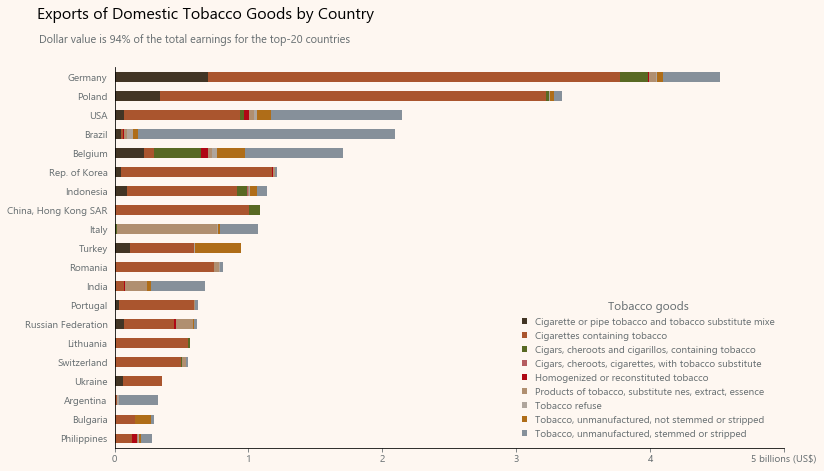

In [57]:
def with_words(value, pos):
    billions = int(value / 1000000000)
    if billions == 5:
        return "{} billions (US$)".format(billions)
    else: 
        return "{}".format(billions)

formatter = FuncFormatter(with_words)
#plt.rcdefaults()
plt.rcParams.update({
    
    'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#B55C60','#AF0714','#B08F70','#AFA59C','#AF6D18','#86909A']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
     'legend.frameon': False,
     'legend.fontsize': 'small',
     'legend.handlelength': 0.5,
     'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F',
  
     })

ax = dom.plot(kind='barh',x='Country_Area',stacked=True, figsize=(12,7))

ax.set_xlabel('something',fontsize=12,fontname="Segoe UI Symbol")
ax.set_ylabel("something",fontsize=12,fontname="Segoe UI Symbol")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.legend(title='Tobacco goods')
ax.set_xlim(0,5000000000)

ax.xaxis.set_major_formatter(formatter)

title_string = "Exports of Domestic Tobacco Goods by Country"
subtitle_string = "Dollar value is 94% of the total earnings for the top-20 countries"
plt.suptitle(title_string, y=1, x=0.23, fontsize=16,color='black')
plt.title(subtitle_string, y=1.05, x=0.12, fontsize=11)


plt.savefig("domestic.pdf",transparent=True)
plt.savefig('domestic.png')
plt.show()


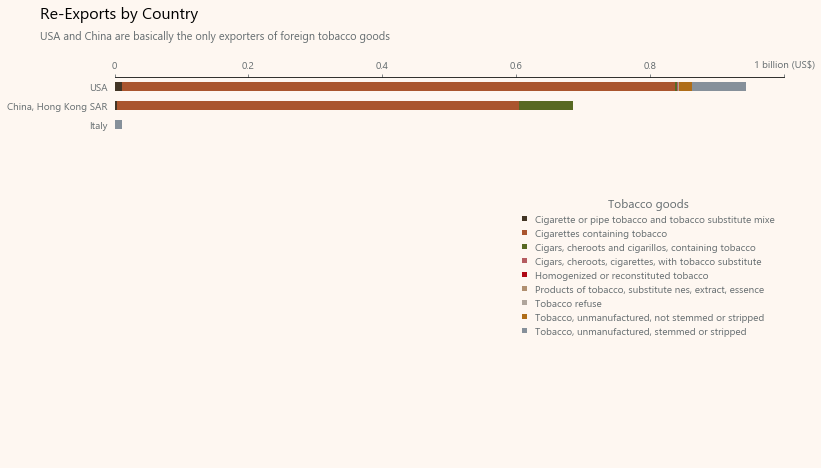

In [60]:
#for_goods.plot(kind='barh',x='Country_Area',stacked=True, figsize=(12,7))
# def with_bil(value, pos):
#     billions = int(value / 1000000000)
#     if billions == 1:
#         return "{} billion (US$)".format(billions)
#     else: 
#         return "{}".format(billions)

# formatter = FuncFormatter(with_bil)


ax = for_goods.plot(kind='barh',x='Country_Area',stacked=True, figsize=(12,7))

# ax.xaxis.set_major_formatter(formatter)

#plt.rcdefaults()
plt.rcParams.update({
    'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#B55C60','#AF0714','#B08F70','#AFA59C','#AF6D18','#86909A']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': False,
    'axes.spines.bottom': False,
    'axes.spines.top': True,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'right',
     'legend.frameon': False,
     'legend.fontsize': 'small',
     'legend.handlelength': 0.5,
     'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })


ax.set_xlabel('something',fontsize=12,fontname="Segoe UI Symbol")
ax.set_ylabel("something",fontsize=12,fontname="Segoe UI Symbol")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.tick_params(left=False)
ax.legend(title='Tobacco goods')
#ax.legend(loc='lower right')
ax.set_xlim(0,1000000000)

plt.tick_params(
      axis='x',          # changes apply to the x-axis
      which='major',      # both major and minor ticks are affected
      bottom=False,      # ticks along the bottom edge are off
      top=True,         # ticks along the top edge are off
      labelbottom=False,
      labeltop=True) # labels along the bottom edge are off

ax.set_xticks([0,200000000,400000000,600000000,800000000,1000000000])
ax.set_xticklabels(['0','0.2','0.4','0.6','0.8','1 billion (US$)'],color='#646C6F')

# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(True)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.set_yticks([0,10,20,30,40,50,60])
ax.set_yticklabels(['','','','','','','','','','','','','','','','','','Italy','China, Hong Kong SAR','USA'],color='#646C6F')

title_string = "Re-Exports by Country"
subtitle_string = "USA and China are basically the only exporters of foreign tobacco goods"
plt.suptitle(title_string, y=1.02, x=0.13, fontsize=16,color='black')
plt.title(subtitle_string, y=1.02, x=0.15, fontsize=11,pad=30)

plt.savefig("foreign-goods.pdf")
#plt.savefig('foreign-goods.png')
plt.show()

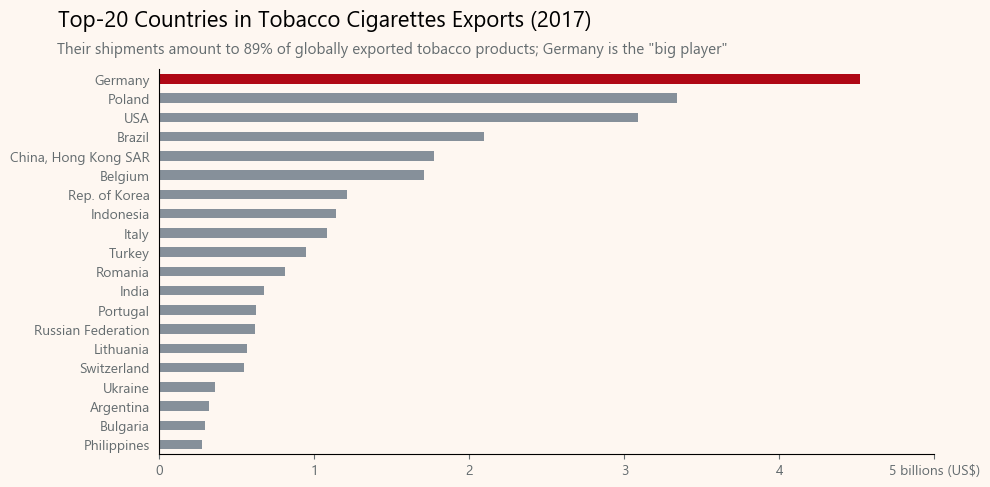

In [62]:
#color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

def color(country):
    if country == 'Germany':
        return '#AF0714'
    else:
        return '#86909A'
    
bar_colors = [color(country) for country in top20_usd17.Country_Area]


# STEP ONE: Build a function
# it should take value and pos
def with_words(value, pos):
    billions = int(value / 1000000000)
    if billions == 5:
        return "{} billions (US$)".format(billions)
    else: 
        return "{}".format(billions)

# # STEP TWO: Use FuncFormatter with that function???
formatter = FuncFormatter(with_words)

# ax = world.plot(x='city', y='people', kind='bar')

# # STEP THREE: Give the axis your formatter
# ax.yaxis.set_major_formatter(formatter)


ax = top20_usd17.plot(kind='barh', x='Country_Area', y='usd_2017',figsize=(10, 5),color=bar_colors)
ax.xaxis.set_major_formatter(formatter)

#,'#AA552E','#586923','#AF0714','#86909A','#B08F70
# CUSTOMIZATION CODE GOES UNDER HERE

ax.set_xlabel('something',fontsize=12,fontname="Leelawadee UI")
ax.set_ylabel('something',fontsize=12,fontname="Leelawadee UI")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.set_xticks([0,1,2,3,4,5])
# ax.set_xticklabels(['0','','1','','2','','3','','5 billion USD'],color='#646C6F')
ax.set_xlim(0,5000000000)
ax.legend_.remove()

title_string = "Top-20 Countries in Tobacco Cigarettes Exports (2017)"
subtitle_string = 'Their shipments amount to 89% of globally exported tobacco products; Germany is the "big player"'
#'Germany is the "big player" amongst the counties that earnt the 89% dollar value of globally exported tobacco cigarettes during 2017'
plt.suptitle(title_string, y=1, x=0.29, fontsize=16,color='black')
plt.title(subtitle_string, y=1.02, x=0.3, fontsize=11)

plt.rcdefaults()
plt.rcParams.update({
    #ERROR: 'NameError: name 'cycler' is not defined'
    'axes.prop_cycle': cycler('color', ['#423525', 'yellow', 'blue']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
    'legend.frameon': False,
    'legend.fontsize': 'small',
    'legend.handlelength': 0.5,
    'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })

# ax.set_xlabel('GDP per capita',fontsize=12,fontname="Leelawadee UI")
# ax.set_ylabel('Life expectancy',fontsize=12,fontname="Leelawadee UI")
# ax.axes.labelpad: 4.0

ax.tick_params(axis='y',left=False)

# then we save it
plt.savefig("top-20-exporters-2017.pdf")
plt.show()

In [63]:
usd_2017 = df_2017.groupby('Country_Area')['USD'].sum().reset_index(name='usd_2017')
top20_usd17 = usd_2017.sort_values(by='usd_2017', ascending=True).tail(20)
top20_usd17.tail()

,Country_Area,usd_2017
10,"China, Hong Kong SAR",1769986179.50
6,Brazil,2092160511.00
54,USA,3089718026.00
39,Poland,3340492853.00
18,Germany,4519131766.27


In [64]:
weight_2017 = df_2017.groupby('Country_Area')['Weight'].sum().reset_index(name='weight_2017')
top20_weight17 = weight_2017.sort_values(by='weight_2017',ascending=True).tail(20)
top20_weight17.tail()

,Country_Area,weight_2017
54,USA,194537171.00
4,Belgium,205661810.42
39,Poland,236983121.80
18,Germany,273628444.00
6,Brazil,462219920.00


In [65]:
#df_2017

In [66]:
merge = pd.merge(top20_usd17,weight_2017,on='Country_Area')
merge.head()

,Country_Area,usd_2017,weight_2017
0,Philippines,277496260.00,85363016.07
1,Bulgaria,292856145.72,41889947.18
2,Argentina,322269829.52,86333392.99
3,Ukraine,355730145.18,43353838.54
4,Switzerland,548545302.90,32666253.59


In [67]:
df_2017.Weight.sum()

2735257753.456167

In [68]:
merge['weight_pct'] = (merge['weight_2017']/ df_2017.Weight.sum()) * 100
merge.head(1)

,Country_Area,usd_2017,weight_2017,weight_pct
0,Philippines,277496260.00,85363016.07,3.12


In [69]:
merge['ucd_pct'] = (merge['usd_2017']/ df_2017.USD.sum()) * 100
merge.head(1)

,Country_Area,usd_2017,weight_2017,weight_pct,ucd_pct
0,Philippines,277496260.00,85363016.07,3.12,0.95


In [70]:
world_pct = merge[['Country_Area','ucd_pct']]
world_pct

,Country_Area,ucd_pct
0,Philippines,0.95
1,Bulgaria,1.00
2,Argentina,1.10
3,Ukraine,1.22
4,Switzerland,1.88
5,Lithuania,1.93
6,Russian Federation,2.11
7,Portugal,2.14
8,India,2.30
9,Romania,2.77


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


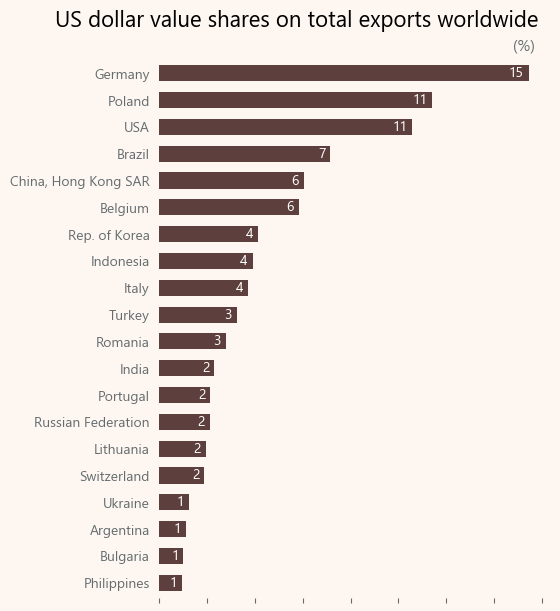

In [71]:
#ax = world_pct.plot(kind='barh',x='Country_Area',figsize=(5,7),width=0.6)
def color_rank(country):
    if country == 'Germany':
        return '#AA552E'
    else:
        return '#5D3F3D'
    
bar_colors = [color_rank(country) for country in world_pct.Country_Area]

ax = world_pct.plot(kind='barh',x='Country_Area',figsize=(5,7),width=0.6,color=bar_colors)

for i, bar in enumerate(ax.patches):
    #print(bar.get_width())
    print(i)
    value= int(round(bar.get_width()))
    x_pos = bar.get_width() - 0.2
    y_pos = i 
    ax.text(x_pos,y_pos,value,va='center',ha='right',color='white',fontweight='bold',fontsize=10)
    #verticalalignment

ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticklabels([])

ax.legend_.remove()

title_string = "US dollar value shares on total exports worldwide"
subtitle_string = '(%)'
#'Germany is the "big player" amongst the counties that earnt the 89% dollar value of globally exported tobacco cigarettes during 2017'
plt.suptitle(title_string, y=0.95, x=0.4, fontsize=16,color='black')
plt.title(subtitle_string, y=1, x=0.94, fontsize=11)

plt.rcParams.update({
    #ERROR: 'NameError: name 'cycler' is not defined'
#     'axes.prop_cycle': cycler('color', ['#423525', 'yellow', 'blue']),
     'axes.facecolor': '#FEF7F1',
     'savefig.facecolor': '#FEF7F1',
     'figure.facecolor': '#F8E6DA',
#     'axes.spines.left': True,
#     'axes.spines.bottom': True,
#     'axes.spines.top': False,
#     'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': False,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'legend.loc': 'best',
    'legend.frameon': False,
    'legend.fontsize': 'small',
    'legend.handlelength': 0.5,
    'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })

# ax.set_xlabel('GDP per capita',fontsize=12,fontname="Leelawadee UI")
# ax.set_ylabel('Life expectancy',fontsize=12,fontname="Leelawadee UI")
# ax.axes.labelpad: 4.0

ax.tick_params(axis='both',left=False)


# then we save it
plt.savefig("trade-value-percentages.pdf")
plt.show()

In [72]:
pd.options.display.float_format = '{:.2f}'.format

In [73]:
df_2017.head()

,Country_Area,Year,Commodity,Flow,USD,Weight,Flow2
198,Algeria,2017,Cigarettes containing tobacco,Export,11974.74,865.81,domestic
200,Algeria,2017,"Products of tobacco, substitute nes, extract, essence",Export,5808.69,410.00,domestic
821,Argentina,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,5629831.27,2276578.90,domestic
823,Argentina,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,287135184.05,60726136.60,domestic
825,Argentina,2017,Tobacco refuse,Export,10458316.40,20653260.00,domestic


In [74]:
dropna_w = df_2017.dropna(subset=['Weight'])
dropna_w.head()

,Country_Area,Year,Commodity,Flow,USD,Weight,Flow2
198,Algeria,2017,Cigarettes containing tobacco,Export,11974.74,865.81,domestic
200,Algeria,2017,"Products of tobacco, substitute nes, extract, essence",Export,5808.69,410.00,domestic
821,Argentina,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,5629831.27,2276578.90,domestic
823,Argentina,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,287135184.05,60726136.60,domestic
825,Argentina,2017,Tobacco refuse,Export,10458316.40,20653260.00,domestic


In [76]:
sub_weight = dropna_w.groupby('Country_Area')['Weight'].sum().reset_index(name='sub_weight')
sub_weight.head()

,Country_Area,sub_weight
0,Algeria,1275.81
1,Argentina,86333392.99
2,Armenia,25554093.61
3,Barbados,73970.00
4,Belgium,205661810.42


In [77]:
sub_usd = dropna_w.groupby('Country_Area')['USD'].sum().reset_index(name='sub_usd')
sub_usd.head()

,Country_Area,sub_usd
0,Algeria,17783.43
1,Argentina,322269829.52
2,Armenia,242388413.41
3,Barbados,4463614.00
4,Belgium,1647977650.73


In [78]:
join_subs = pd.merge(sub_usd, sub_weight,on='Country_Area')
join_subs.head()

,Country_Area,sub_usd,sub_weight
0,Algeria,17783.43,1275.81
1,Argentina,322269829.52,86333392.99
2,Armenia,242388413.41,25554093.61
3,Barbados,4463614.00,73970.00
4,Belgium,1647977650.73,205661810.42


In [79]:
join_subs['USD_per_kg'] = join_subs['sub_usd']/join_subs['sub_weight']
join_subs.head()

,Country_Area,sub_usd,sub_weight,USD_per_kg
0,Algeria,17783.43,1275.81,13.94
1,Argentina,322269829.52,86333392.99,3.73
2,Armenia,242388413.41,25554093.61,9.49
3,Barbados,4463614.00,73970.00,60.34
4,Belgium,1647977650.73,205661810.42,8.01


In [80]:
usd_w_17 = merge[['Country_Area','usd_2017', 'weight_2017']]
usd_w_17['price_per_kg'] = usd_w_17['usd_2017']/usd_w_17['weight_2017']
usd_w_17

C:\Users\kellykiki\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country_Area,usd_2017,weight_2017,price_per_kg
0,Philippines,277496260.00,85363016.07,3.25
1,Bulgaria,292856145.72,41889947.18,6.99
2,Argentina,322269829.52,86333392.99,3.73
3,Ukraine,355730145.18,43353838.54,8.21
4,Switzerland,548545302.90,32666253.59,16.79
5,Lithuania,563968538.00,37361463.02,15.09
6,Russian Federation,616166205.00,71583880.72,8.61
7,Portugal,624836275.59,32197892.11,19.41
8,India,673506406.92,163004205.58,4.13
9,Romania,808751319.19,57439850.58,14.08


In [81]:
#DROP ROWS WITH NAN IN WEIGHT COLUMN
usd_w_17 = usd_w_17[usd_w_17.Country_Area != 'China, Hong Kong SAR']
usd_w_17 = usd_w_17[usd_w_17.Country_Area != 'Indonesia']
usd_w_17 = usd_w_17[usd_w_17.Country_Area != 'USA']
usd_w_17

,Country_Area,usd_2017,weight_2017,price_per_kg
0,Philippines,277496260.00,85363016.07,3.25
1,Bulgaria,292856145.72,41889947.18,6.99
2,Argentina,322269829.52,86333392.99,3.73
3,Ukraine,355730145.18,43353838.54,8.21
4,Switzerland,548545302.90,32666253.59,16.79
5,Lithuania,563968538.00,37361463.02,15.09
6,Russian Federation,616166205.00,71583880.72,8.61
7,Portugal,624836275.59,32197892.11,19.41
8,India,673506406.92,163004205.58,4.13
9,Romania,808751319.19,57439850.58,14.08


In [82]:
round(usd_w_17.price_per_kg.mean(),2)

10.36

In [83]:
def get_rates(row):
    pr_kg = row['price_per_kg']
    return pd.Series({
        'rates': pr_kg
        })

In [84]:
usd_w_17['rates'] = usd_w_17.apply(get_rates, axis=1)
usd_w_17.head(2)

,Country_Area,usd_2017,weight_2017,price_per_kg,rates
0,Philippines,277496260.00,85363016.07,3.25,3.25
1,Bulgaria,292856145.72,41889947.18,6.99,6.99


In [85]:
def get_rate(row):
    rate = row['rates']
    if rate < 10:
        return "below average"
    elif rate >=10 and rate <=11:
        return "average"
    else:
        return 'above average'

In [86]:
usd_w_17['rates'] = usd_w_17.apply(get_rate, axis=1)
usd_w_17.head()

,Country_Area,usd_2017,weight_2017,price_per_kg,rates
0,Philippines,277496260.00,85363016.07,3.25,below average
1,Bulgaria,292856145.72,41889947.18,6.99,below average
2,Argentina,322269829.52,86333392.99,3.73,below average
3,Ukraine,355730145.18,43353838.54,8.21,below average
4,Switzerland,548545302.90,32666253.59,16.79,above average


In [87]:
usd_w_17 = usd_w_17.sort_values(by='price_per_kg',ascending=True)
usd_w_17

,Country_Area,usd_2017,weight_2017,price_per_kg,rates
0,Philippines,277496260.00,85363016.07,3.25,below average
2,Argentina,322269829.52,86333392.99,3.73,below average
8,India,673506406.92,163004205.58,4.13,below average
16,Brazil,2092160511.00,462219920.00,4.53,below average
1,Bulgaria,292856145.72,41889947.18,6.99,below average
10,Turkey,946199456.00,124138937.00,7.62,below average
3,Ukraine,355730145.18,43353838.54,8.21,below average
14,Belgium,1703914772.37,205661810.42,8.29,below average
6,Russian Federation,616166205.00,71583880.72,8.61,below average
11,Italy,1080954060.14,106270460.00,10.17,average


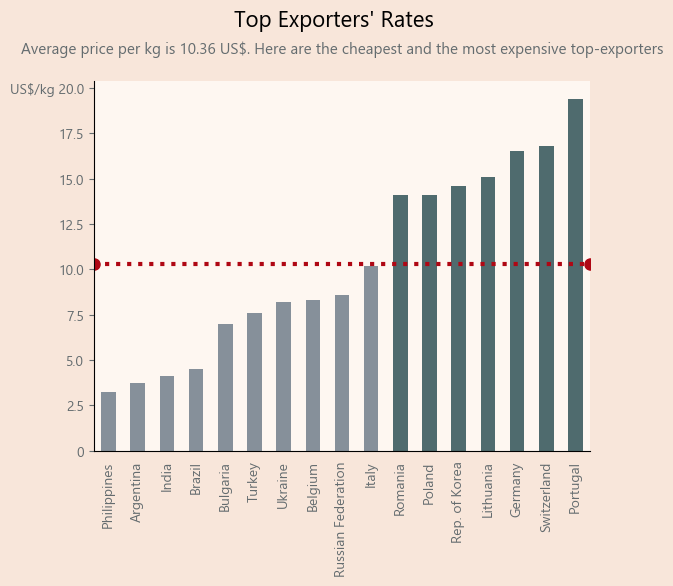

In [88]:
def get_rate(price):
    if price <= 10.36:
        return '#86909A'
#     if price > 11:
#         return '#4F6B6E' #AFA59C
    else:
        return '#4F6B6E'
    
bar_colors = [get_rate(price) for price in usd_w_17.price_per_kg]


plt.rcParams.update({
     'axes.facecolor': '#FEF7F1',
     'savefig.facecolor': '#FEF7F1',
     'figure.facecolor': '#F8E6DA',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    #'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': False,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
#     'xtick.labelsize': 'small',
#     'ytick.labelsize': 'small',
#     'legend.loc': 'best',
#     'legend.frameon': False,
#     'legend.fontsize': 'small',
#     'legend.handlelength': 0.5,
#     'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })

ax = usd_w_17.plot(kind='bar',x='Country_Area',y='price_per_kg',color=bar_colors)

# ax = usd_w_17.sort_values(by='price_per_kg',ascending=True).plot(kind='bar',x='Country_Area',y='price_per_kg',color=bar_colors)

ax_avg = plt.axhline(y=10.32, color='#AF0714', marker='o', markersize=8, linewidth=3, linestyle=':',alpha = 1, label = 'average price per kg')

#ax.legend(fontsize=15, loc=2)

ax.legend_.remove()
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

ax.set_yticks([0,2.5,5.0,7.5,10.0,12.5,15.0,17.5,20.0])
ax.set_yticklabels(['0','2.5','5.0','7.5','10.0','12.5','15.0','17.5','US$/kg 20.0'],color='#646C6F')

title_string = "Top Exporters' Rates"
subtitle_string = 'Average price per kg is 10.36 US$. Here are the cheapest and the most expensive top-exporters'
#'Germany is the "big player" amongst the counties that earnt the 89% dollar value of globally exported tobacco cigarettes during 2017'
plt.suptitle(title_string, y=1.03, x=0.5, fontsize=16,color='black')
plt.title(subtitle_string, y=1, x=0.5, fontsize=11, pad=20)

plt.savefig("price-per-kg.pdf")
plt.show()

In [89]:
germany = export_df[export_df['Country_Area']=='Germany']
germany.head()

,Country_Area,Year,Commodity,Flow,USD,Weight,Flow2
16909,Germany,2017,"Tobacco, unmanufactured, not stemmed or stripped",Export,47142234.01,6208430.00,domestic
16911,Germany,2017,"Tobacco, unmanufactured, stemmed or stripped",Export,421106890.83,59851021.00,domestic
16913,Germany,2017,Tobacco refuse,Export,6639470.15,7110330.00,domestic
16915,Germany,2017,"Cigars, cheroots and cigarillos, containing tobacco",Export,207915273.48,4553525.00,domestic
16917,Germany,2017,Cigarettes containing tobacco,Export,3077966523.63,130394474.00,domestic


In [90]:
german_usd = germany.groupby('Year').USD.sum().reset_index(name='german_usd')
german_usd.head()

,Year,german_usd
0,1991,1248924008.00
1,1992,1450401968.00
2,1993,1240888008.00
3,1994,1420087040.00
4,1995,1450777032.00


In [91]:
german_weight = germany.groupby('Year').Weight.sum().reset_index(name='german_weight')
german_weight.head()

,Year,german_weight
0,1991,118757463.00
1,1992,116123440.00
2,1993,106608802.00
3,1994,128239999.00
4,1995,123111198.00


In [92]:
poland = export_df[export_df['Country_Area']=='Poland']
poland_usd = poland.groupby('Year').USD.sum().reset_index(name='poland_usd')
poland_usd.head()

,Year,poland_usd
0,1994,53496000.00
1,1995,26932001.00
2,1996,43555000.00
3,1997,47625674.00
4,1998,44607000.00


In [93]:
poland_weight = poland.groupby('Year').Weight.sum().reset_index(name='poland_weight')
poland_weight.head()

,Year,poland_weight
0,1994,6016000.00
1,1995,4982794.00
2,1996,10669728.00
3,1997,13164254.00
4,1998,13287925.00


In [94]:
usa = export_df[export_df['Country_Area']=='USA']
usa_usd = usa.groupby('Year').USD.sum().reset_index(name='usa_usd')
usa_usd.head()

,Year,usa_usd
0,1991,6044897602.00
1,1992,6194879623.00
2,1993,5607950732.00
3,1994,6811425912.00
4,1995,6714925325.00


In [95]:
usa_weight = usa.groupby('Year').USD.sum().reset_index(name='usa_weight')
usa_weight.head()

,Year,usa_weight
0,1991,6044897602.00
1,1992,6194879623.00
2,1993,5607950732.00
3,1994,6811425912.00
4,1995,6714925325.00


In [96]:
brazil = export_df[export_df['Country_Area']=='Brazil']
#brazil
brazil_usd = brazil.groupby('Year').USD.sum().reset_index(name='brazil_usd')
brazil_usd.head()

,Year,brazil_usd
0,1989,569332393.00
1,1990,623606550.00
2,1991,818362389.00
3,1992,981599825.00
4,1993,900781598.00


In [97]:
china = export_df[export_df.Country_Area.str.contains("China", case=False, na=False)]
#china.head()
china_usd = china.groupby('Year').USD.sum().reset_index(name='china_usd')
china_usd.head()

,Year,china_usd
0,1991,372906.00
1,1992,442388074.00
2,1993,3346462319.00
3,1994,3580929018.00
4,1995,3645056020.00


In [98]:
#china.Year.value_counts()

In [99]:
hist_usd = pd.merge(pd.merge(german_usd,poland_usd,on='Year'),usa_usd,on='Year')
hist_usd.head()

,Year,german_usd,poland_usd,usa_usd
0,1994,1420087040.00,53496000.00,6811425912.00
1,1995,1450777032.00,26932001.00,6714925325.00
2,1996,1681098798.00,43555000.00,6698720493.00
3,1997,1449310073.00,47625674.00,6665179625.00
4,1998,1643165032.00,44607000.00,6333127932.00


In [100]:
hist_usd = pd.merge(pd.merge(hist_usd,brazil_usd,on='Year'),china_usd,on='Year')
hist_usd.head()

,Year,german_usd,poland_usd,usa_usd,brazil_usd,china_usd
0,1994,1420087040.00,53496000.00,6811425912.00,1030707464.00,3580929018.00
1,1995,1450777032.00,26932001.00,6714925325.00,1174961005.00,3645056020.00
2,1996,1681098798.00,43555000.00,6698720493.00,1515392407.00,4022830973.00
3,1997,1449310073.00,47625674.00,6665179625.00,1664806192.00,2567161094.00
4,1998,1643165032.00,44607000.00,6333127932.00,1558864024.00,2121962656.00


In [101]:
hist_usd.columns = hist_usd.columns.str.replace('german_usd', 'Germany')
hist_usd.columns = hist_usd.columns.str.replace('poland_usd', 'Poland')
hist_usd.columns = hist_usd.columns.str.replace('usa_usd','USA')
hist_usd.columns = hist_usd.columns.str.replace('brazil_usd','Brazil')
hist_usd.columns = hist_usd.columns.str.replace('china_usd','China')
hist_usd.head()

,Year,Germany,Poland,USA,Brazil,China
0,1994,1420087040.00,53496000.00,6811425912.00,1030707464.00,3580929018.00
1,1995,1450777032.00,26932001.00,6714925325.00,1174961005.00,3645056020.00
2,1996,1681098798.00,43555000.00,6698720493.00,1515392407.00,4022830973.00
3,1997,1449310073.00,47625674.00,6665179625.00,1664806192.00,2567161094.00
4,1998,1643165032.00,44607000.00,6333127932.00,1558864024.00,2121962656.00


In [102]:
hist_w = pd.merge(pd.merge(german_weight,poland_weight,on='Year'),usa_weight,on='Year')
hist_w.head()

,Year,german_weight,poland_weight,usa_weight
0,1994,128239999.00,6016000.00,6811425912.00
1,1995,123111198.00,4982794.00,6714925325.00
2,1996,145286001.00,10669728.00,6698720493.00
3,1997,141665425.00,13164254.00,6665179625.00
4,1998,152201196.00,13287925.00,6333127932.00


In [103]:
colors = ['#423525','#586923','#AF0714','#AA552E','#86909A','#B08F70']

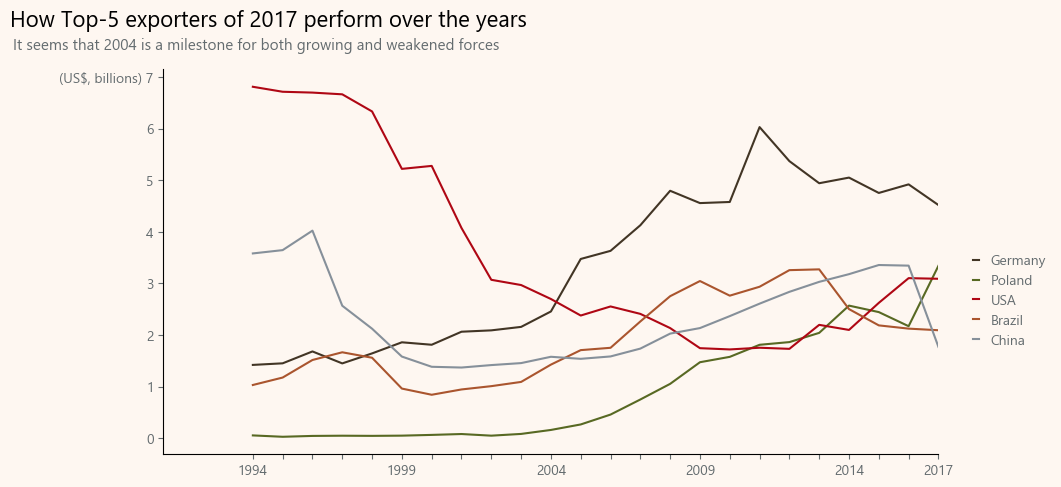

In [105]:
from matplotlib.ticker import FuncFormatter


def words(value, pos):
    billions = int(value / 1000000000)
    if billions == 7:
        return "(US$, billions) {}".format(billions)
    else: 
        return "{}".format(billions)

# # STEP TWO: Use FuncFormatter with that function???
formatter = FuncFormatter(words)

# def get_line(country):
#     if country == 'Germany' or country == 'USA':
#         return '_'
#     else:
#         return ':'
    
# line_styles = [get_line(country) for country in export_df.Country_Area]

ax = hist_usd.plot(kind='line', x='Year', figsize=(10, 5), color=colors)

# STEP THREE: Give the axis your formatter
ax.yaxis.set_major_formatter(formatter)

#ax = hist_usd.plot(kind='line', x='Year', figsize=(10, 5), color=colors)

plt.rcdefaults()
plt.rcParams.update({
    #'axes.prop_cycle': cycler('color', ['#423525','#AA552E','#586923','#AF0714','#86909A','#B08F70']),
    'axes.facecolor': '#FEF7F1',
    'savefig.facecolor': '#FEF7F1',
    'figure.facecolor': '#FEF7F1',
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
#    'axes.grid':True
#   'grid.color':'#ffffff',
#   'grid.linewidth':2,
#    'grid.alpha':0.6,
    'xtick.top': False,
    'xtick.bottom': True,
    'xtick.color': '#646C6F',
    'ytick.color':'#646C6F',
    #'ytick.bottom': True,
    #'ytick.color': 'black'
    #'xtick.major.size': 7,
    #'xtick.major.width': 3,
    #'xtick.major.pad': 0,
    #'xtick.direction': 'in',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
#     'legend.loc': 'lower right',
     'legend.frameon': False,
     'legend.fontsize': 'small',
     'legend.handlelength': 0.5,
     'legend.handleheight': 0.5,
    #'legend.columnspacing': 2.0,
    'font.family': 'Segoe UI Symbol',
    'font.size':12,
    'text.color':'#646C6F'
     })


ax.set_xlabel('Visas by continent',fontsize=12,fontname="Segoe UI Symbol")
ax.set_ylabel("It's more than 15 years that South America has been coming first",fontsize=12,fontname="Segoe UI Symbol")
ax.axes.labelpad: 4.0
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.set_xlim(1991,2017)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(True)
# ax.spines['bottom'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.set_yticks([0,10,20,30,40,50,60])
# ax.set_yticklabels(['0','','20','','40','','60'],color='#646C6F')
ax.set_xticks([1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])
ax.set_xticklabels(['1994','','','','','1999','','','','','2004','','','','','2009','','','','','2014','','','2017'],color='#646C6F')

ax.legend(loc='lower right',
          bbox_to_anchor=(1.02, 0.3),
          bbox_transform=plt.gcf().transFigure)

title_string = "How Top-5 exporters of 2017 perform over the years"
subtitle_string = "It seems that 2004 is a milestone for both growing and weakened forces"
plt.suptitle(title_string, y=1, x=0.23, fontsize=16,color='black')
plt.title(subtitle_string, y=1.03, x=0.12, fontsize=11)

plt.savefig("top-5-exporters-overtime.pdf")
plt.show()
